# Facebook Regression
## Predicting Likes

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier

In [2]:
facebook = pd.read_csv('facebook_train.csv')
facebook.head()

,total_followers,type,category,month,weekday,hour,paid,comment,like,share
0,124050,Photo,3,6,4,17,1,3,77,16
1,132556,Photo,2,8,3,24,0,11,313,50
2,92786,Photo,2,2,6,17,1,2,145,39
3,135632,Photo,1,9,2,1,0,2,299,49
4,139540,Link,1,12,3,17,1,7,229,21


### Predicting Likes
http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

In [5]:
# Define training and test data

pd.options.mode.chained_assignment = None

facebook['is_photo'] = np.where(facebook['type']=='Photo',1,0)
facebook['is_link'] = np.where(facebook['type']=='Link',1,0)
facebook['is_status'] = np.where(facebook['type']=='Status',1,0)

facebook_data = facebook[['total_followers','month','weekday','hour','paid',
                          'is_photo','is_link','is_status']]

facebook_target = facebook.like
x_train, x_test, y_train, y_test = train_test_split(facebook_data, facebook_target, 
                                                    test_size=0.2, random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((317, 8), (317,), (80, 8), (80,))

In [6]:
# Train a linear regression model on the data
regression = linear_model.LinearRegression()
regression.fit(x_train, y_train)
y_pred = regression.predict(x_test)

Coefficients: 
 [ 5.50216302e-03 -1.99659371e+01  1.42935796e+01  1.18808524e+00
  1.29018226e+02  6.14795340e+01 -5.08905643e+01  2.73554926e+01]
Mean squared error: 113450.80
Variance score: -0.07


[]

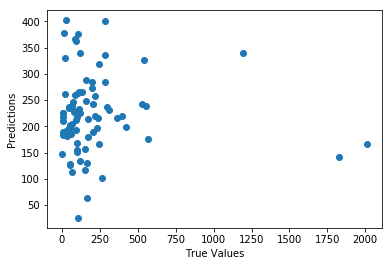

In [7]:
# Evaluate performance of linear regression model
print('Coefficients: \n', regression.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot()

In [9]:
input_variables = facebook_data.columns
coefficients = regression.coef_

frame = pd.DataFrame({'variables':input_variables, 'coefficients': coefficients})
frame[['variables','coefficients']]

,variables,coefficients
0,total_followers,0.005502
1,month,-19.965937
2,weekday,14.293580
3,hour,1.188085
4,paid,129.018226
5,is_photo,61.479534
6,is_link,-50.890564
7,is_status,27.355493


Mean squared error: 55184.87
Variance score: -0.11


[]

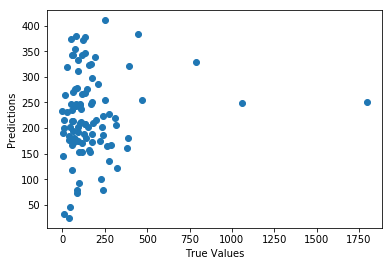

In [12]:
facebook_test = pd.read_csv('facebook_test.csv')

pd.options.mode.chained_assignment = None
facebook_test['is_photo'] = np.where(facebook_test['type']=='Photo',1,0)
facebook_test['is_link'] = np.where(facebook_test['type']=='Link',1,0)
facebook_test['is_status'] = np.where(facebook_test['type']=='Status',1,0)

facebook_test_data = facebook_test[['total_followers','month','weekday','hour','paid',
                          'is_photo','is_link','is_status']]

facebook_test_target = facebook_test.like

y_pred_test = regression.predict(facebook_test_data)

### Model Performance

Mean squared error: 55184.87
Mean absolute error: 152.85
Median absolute error: 132.44
Variance score, R^2: -0.11


[]

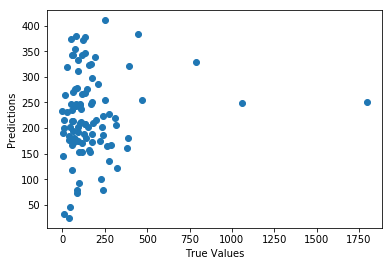

In [27]:
print("Mean squared error: %.2f"
      % mean_squared_error(facebook_test_target, y_pred_test))
print('Mean absolute error: %.2f' % mean_absolute_error(facebook_test_target, y_pred_test))
print('Median absolute error: %.2f' % median_absolute_error(facebook_test_target, y_pred_test))
print('Variance score, R^2: %.2f' % r2_score(facebook_test_target, y_pred_test))


plt.scatter(facebook_test_target, y_pred_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot()

### Variable Significance

**Expected**
- Whether or not the post was paid for is most important (129).
- Weekday positively influences likes, as the weekend results in more activity (14).


**Unexpected**
- Total followers seems not to matter at all (0.00). 
- Month is negative, indicating that posts later on in the year get less likes (-19).
- Posting a link is much worse (-50) than posting a photo (61).

# Casualty Classification
## Predict casualty serverity

In [13]:
casualty = pd.read_csv('casualty_train.csv')
casualty.head()

,casualty_class,gender,age,severe,pedestrian_location,pedestrian_movement,travel,year
0,passenger,female,33,False,NaN,NaN,motorbike,2007
1,passenger,female,20,False,NaN,NaN,car,2005
2,passenger,male,52,False,NaN,NaN,car,2006
3,passenger,female,17,False,NaN,NaN,pedestrian,2012
4,passenger,female,20,False,NaN,NaN,motorbike,2010


In [114]:
casualty['age'].value_counts().sort_values()
casualty.dtypes

casualty_class         object
gender                 object
age                    object
severe                   bool
pedestrian_location    object
pedestrian_movement    object
travel                 object
year                    int64
dtype: object

## data prep

In [14]:
casualty.casualty_class.unique()
casualty.dtypes
casualty.isna().sum()
casualty.pedestrian_location.unique()
casualty.pedestrian_movement.unique()

array(['passenger', 'pedestrian', 'driver'], dtype=object)

In [127]:
vals = casualty['age'].values
numerical = [float(x) for x in vals if x != 'Unknown']
mean = np.mean(numerical)
casualty['age'].replace('Unknown', mean, inplace=True)

## K-nearest neighbor

In [128]:
print(casualty.shape)
casualty.dropna()
print(casualty.shape)

(232835, 8)
(232835, 8)


In [129]:
# data preparation
# observations are also unknown
casualty_categorical = casualty[['casualty_class','gender','travel',
                                 'pedestrian_location','pedestrian_movement']]
casualty_categorical = pd.get_dummies(casualty_categorical, dummy_na=True)
casualty_continuous = casualty[['age','year']]
casualty_data = pd.concat([casualty_categorical, casualty_continuous], axis=1)
casualty_target = np.where(casualty[['severe']]==True,1,0)

In [130]:
x_train, x_test, y_train, y_test = train_test_split(casualty_data, casualty_target, 
                                                    test_size=0.2, random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((186268, 35), (186268, 1), (46567, 35), (46567, 1))

In [131]:
y_train = y_train.reshape((186268,))
y_test = y_test.reshape((46567,))

y_train.shape, y_test.shape

((186268,), (46567,))

In [132]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [134]:
y_predict = model.predict(x_train)

In [185]:
from sklearn.metrics import precision_score, recall_score, classification_report, roc_auc_score
print("Accuracy: %.2f" % model.score(x_train, y_predict))
print("Precision: %.2f" % precision_score(y_train, y_predict))
print("Recall: %.2f" % recall_score(y_train, y_predict))
table = classification_report(y_train, y_predict)
print(table)

Accuracy: 1.00
Precision: 0.59
Recall: 0.02
             precision    recall  f1-score   support

          0       0.89      1.00      0.94    166210
          1       0.59      0.02      0.03     20058

avg / total       0.86      0.89      0.85    186268



In [193]:
from sklearn.metrics import roc_curve, auc
y_scores = model.predict_proba(x_test)

y_scores_df = pd.DataFrame(y_scores)
y_scores_1 = y_scores_df[1]  # only for those where severe = 1 (True)

roc_score = roc_auc_score(y_test, y_scores_1)
roc_curve_values = roc_curve(y_test, y_scores_1)

print("ROC: %.2f" % roc_score)

fpr = roc_curve_values[0]
tpr = roc_curve_values[1]
thresholds = roc_curve_values[2]

ROC: 0.60


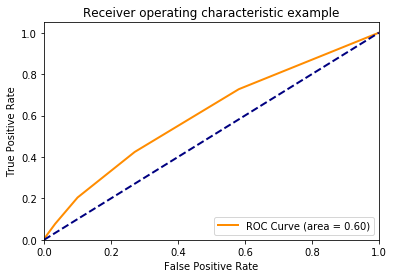

In [194]:
plt.figure()
lw=2
plt.plot(fpr, tpr, color='darkorange',
        lw=lw, label='ROC Curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0,1],[0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()